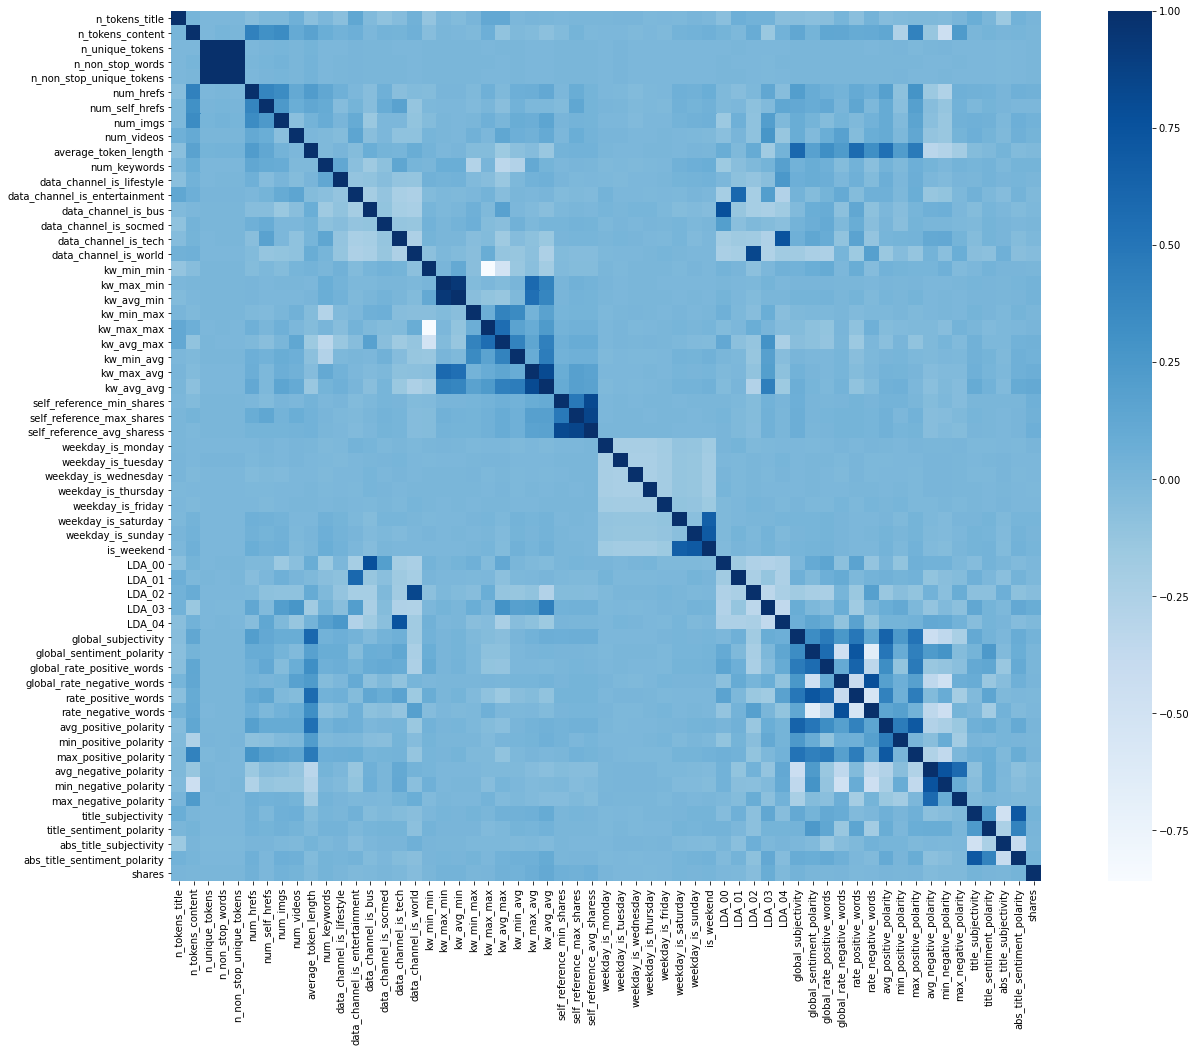

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy import stats

df = pd.read_csv("OnlineNewsPopularity.csv")
plt.subplots(figsize=(24, 16))
sns.heatmap(df.corr(), cmap="Blues", square=True);

In [2]:
z = np.abs(stats.zscore(df))
threshold = 3
df = df[(z<threshold).all(axis=1)]

In [3]:
# for column in df.columns:
#     z = np.abs(stats.zscore(df[column]))
#     threshold = 3
#     df_temp = df[column].reset_index(drop=True)
#     df_temp = df_temp.drop(np.where(z>threshold)[0], axis=0, inplace=True)
#     df[column] = df_temp
# df.shape

In [4]:
print(df.shape)

(21009, 59)


In [5]:
for column in df.columns:
    print(column)
    print(df[column].skew())

n_tokens_title
0.09056613100529262
n_tokens_content
1.3188978543857852
n_unique_tokens
0.277283606857628
n_non_stop_words
0.0
n_non_stop_unique_tokens
-0.10506249897480613
num_hrefs
1.6674023599493515
num_self_hrefs
1.2886069984394677
num_imgs
2.2569844540683555
num_videos
4.733369631434207
average_token_length
0.2737590167814369
num_keywords
-0.06890247851845896
data_channel_is_lifestyle
0
data_channel_is_entertainment
1.9471894017379576
data_channel_is_bus
1.4138683004272177
data_channel_is_socmed
0
data_channel_is_tech
1.2435856840321005
data_channel_is_world
0.9519995490168915
kw_min_min
4.559932433918135
kw_max_min
5.062514798505371
kw_avg_min
2.9679566647820628
kw_min_max
4.34196822580669
kw_max_max
-2.441707078311421
kw_avg_max
0.7349027869951227
kw_min_avg
0.47868218444996663
kw_max_avg
2.778408216610315
kw_avg_avg
1.2048516333008932
self_reference_min_shares
5.34000563766966
self_reference_max_shares
4.31742000243019
self_reference_avg_sharess
4.013003734429309
weekday_is_mond

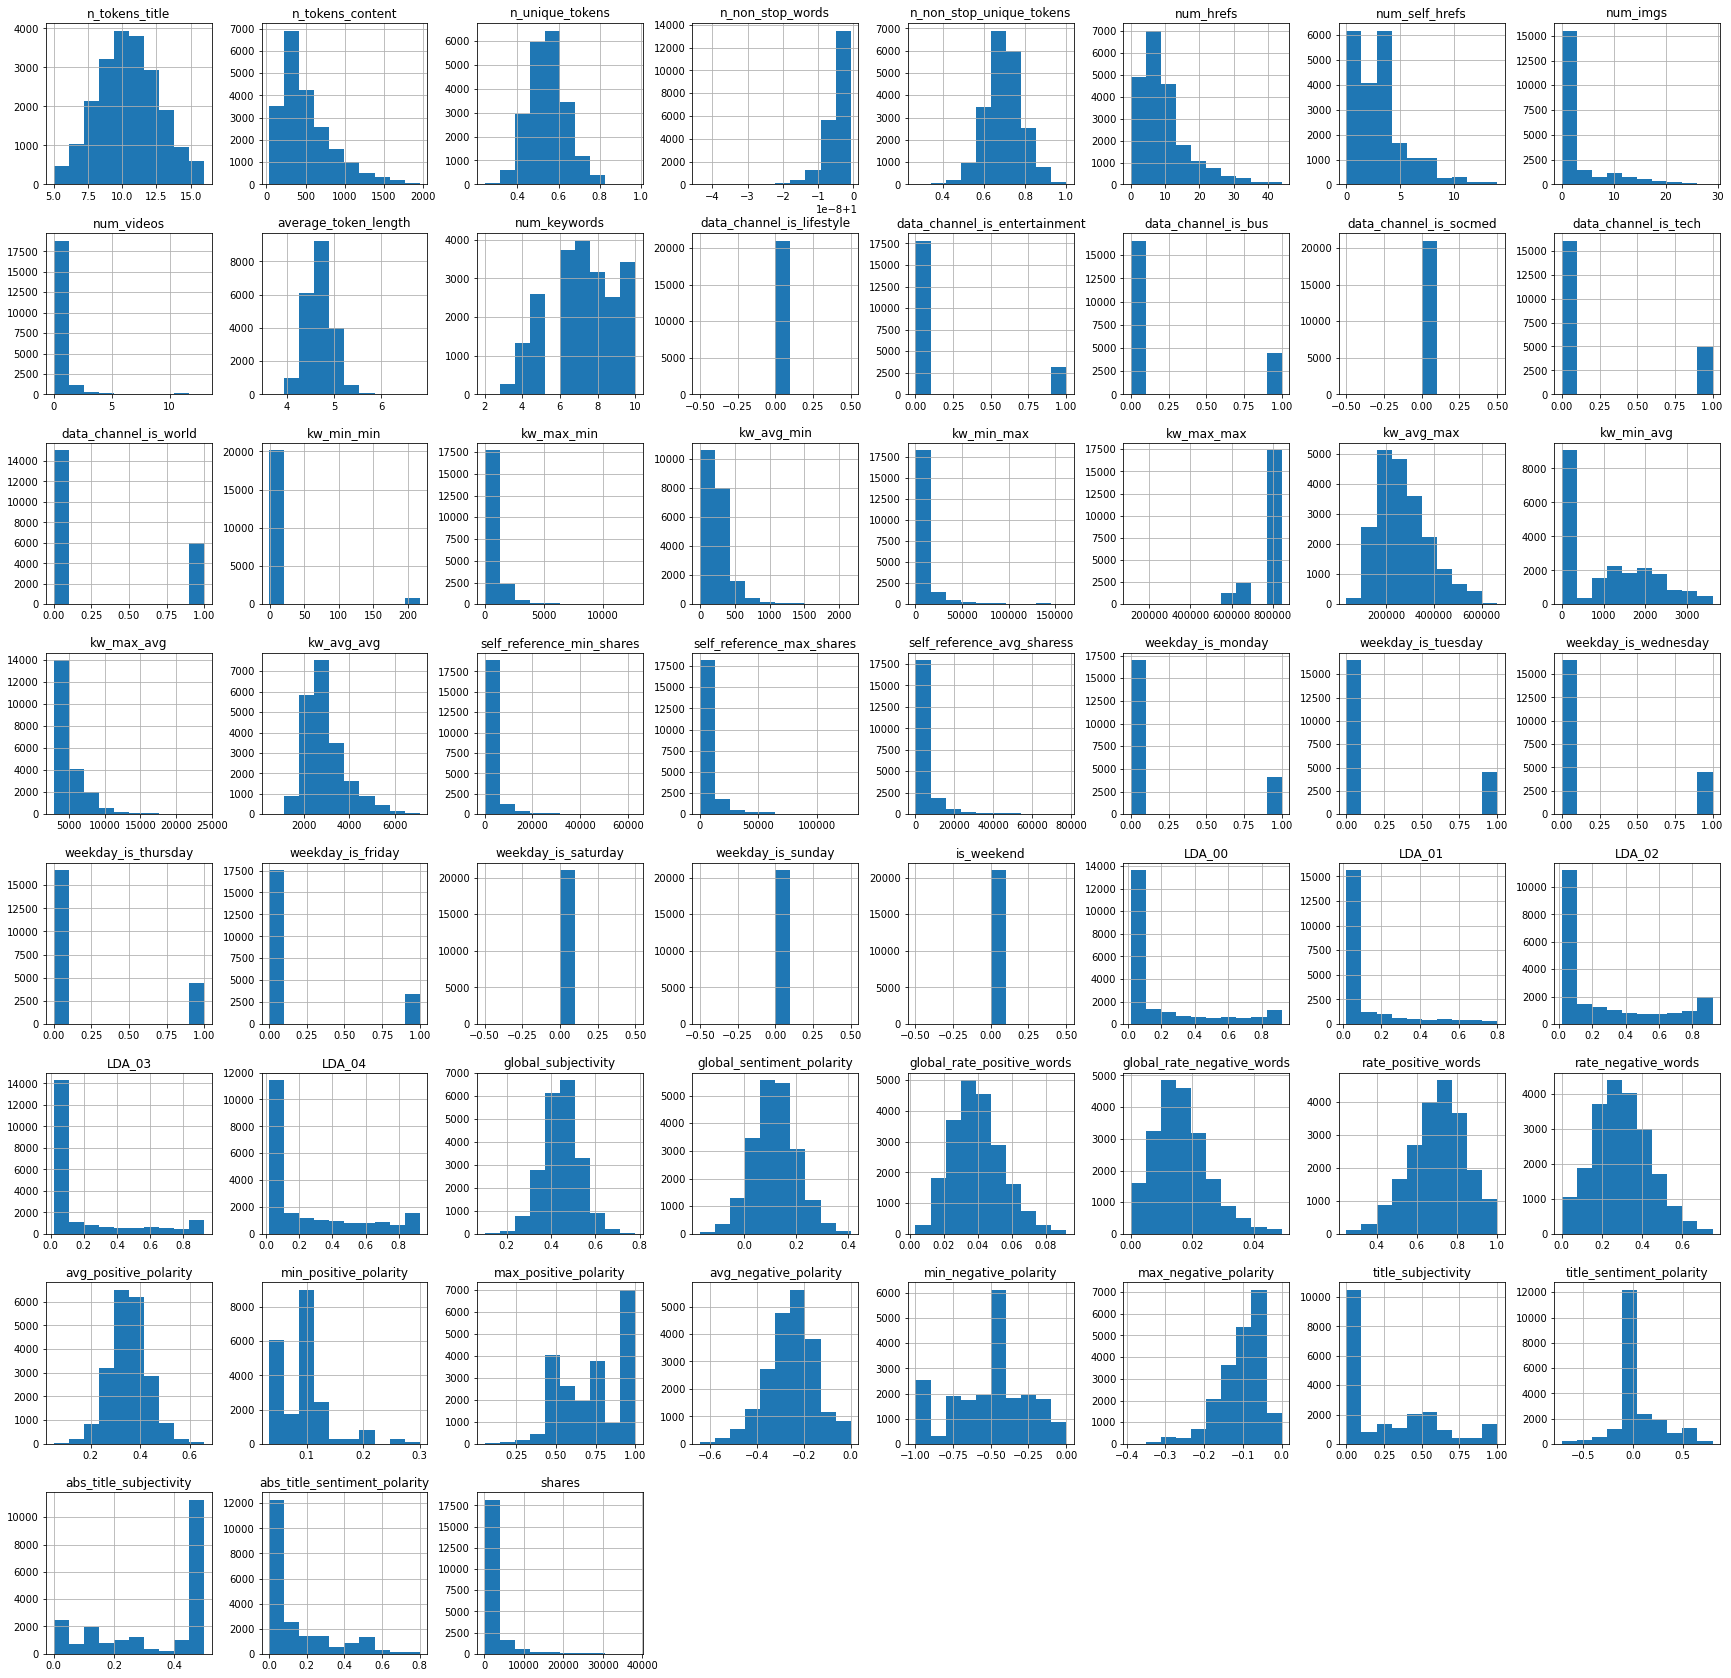

In [6]:
df.hist(figsize=(30,30))
plt.show()

In [7]:
df['shares'].describe()

count    21009.000000
mean      2426.011090
std       3555.589858
min         22.000000
25%        885.000000
50%       1300.000000
75%       2300.000000
max      38200.000000
Name: shares, dtype: float64

In [8]:
median = df['shares'].median()

In [9]:
df['shares'] = np.where((df['shares']<median), 0, 1)

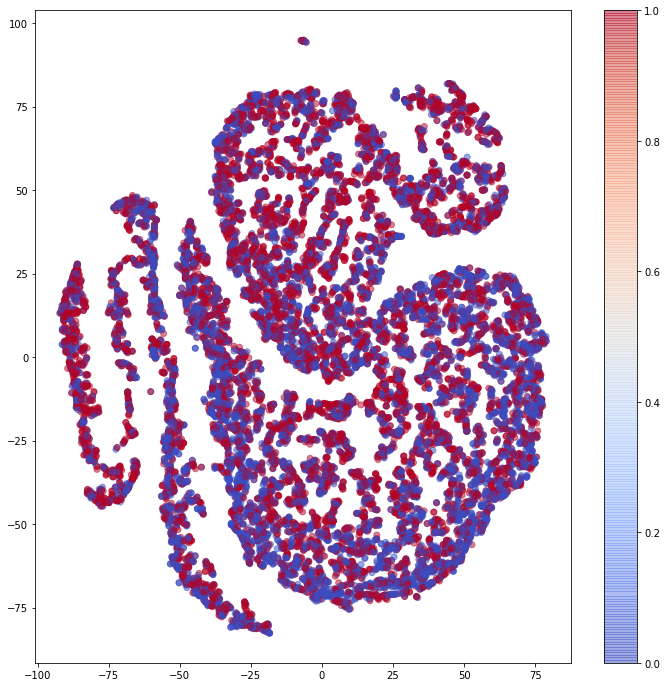

In [10]:
from sklearn import manifold
X = df.drop(['shares'], axis=1)
y = df.shares
tsne = manifold.TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(12, 12))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='coolwarm', alpha=0.5)
plt.colorbar()
plt.show()


In [11]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
std = StandardScaler()
X_train = std.fit_transform(X_train.values)
X_test = std.transform(X_test.values)

In [43]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier(random_state=42)
param_DT = dict(max_depth=range(2,10), max_leaf_nodes=range(2,10), criterion=['gini', 'entropy'], 
                splitter=['random', 'best'])
grid_DT = GridSearchCV(clf_DT, param_grid=param_DT, cv=5, n_jobs=-1, verbose=1)
grid_DT.fit(X, y)
print(grid_DT.best_score_)
print(grid_DT.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
0.6355858020251065
{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8, 'splitter': 'best'}


In [48]:
clf_DT = DecisionTreeClassifier(**grid_DT.best_params_, random_state=42)
clf_DT.fit(X_train, y_train)
pred_DT = clf_DT.predict(X_test)
accuracy_DT = accuracy_score(y_test, pred_DT)
f1_DT = f1_score(y_test, pred_DT, average=None)
print(accuracy_DT)
print(f1_DT)

0.649152865029507
[0.6504836  0.64781196]


In [60]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression()
param_LR = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], penalty=['l2'], C=[0.01, 0.1, 1, 10, 100])
grid_LR = GridSearchCV(clf_LR, param_grid=param_LR, cv=5, n_jobs=-1, verbose=1, error_score=0)
grid_LR.fit(X, y)
print(grid_LR.best_score_)
print(grid_LR.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

C:\Users\lduan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lduan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\lduan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\lduan\anaconda3\lib\site-packages\sklearn\l

C:\Users\lduan\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\lduan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lduan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    

C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\lduan\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not conver

C:\Users\lduan\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\lduan\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\lduan\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the

0.6347291011262814
{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lduan\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [62]:
clf_LR = LogisticRegression(**grid_LR.best_params_, random_state=42)
clf_LR.fit(X_train, y_train)
pred_LR = clf_LR.predict(X_test)
accuracy_LR = accuracy_score(y_test, pred_LR)
f1_LR = f1_score(y_test, pred_LR, average=None)
print(accuracy_LR)
print(f1_LR)

0.6592423377117838
[0.64970646 0.66827279]


In [69]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
param_RF = dict(n_estimators=[200, 400, 600, 800, 1000], max_features=['auto', 'sqrt', 'log2'], criterion=['gini', 'entropy'])
grid_RF = GridSearchCV(clf_RF, param_grid=param_RF, cv=5, n_jobs=-1, verbose=1)
grid_RF.fit(X, y)
print(grid_RF.best_score_)
print(grid_RF.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.65676663417665
{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 800}


In [70]:
clf_RF = RandomForestClassifier(**grid_RF.best_params_, random_state=42)
clf_RF.fit(X_train, y_train)
pred_RF = clf_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, pred_RF)
f1_RF = f1_score(y_test, pred_RF, average=None)
print(accuracy_RF)
print(f1_RF)

0.670854749666857
[0.65917603 0.68175962]


In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier()
param_KNN = dict(n_neighbors=range(1, 21, 2), weights=['uniform', 'distance'], metric=['euclidean', 'manhattan', 'minkowski'])
grid_KNN= GridSearchCV(clf_KNN, param_grid=param_KNN, cv=5, n_jobs=-1, verbose=1)
grid_KNN.fit(X, y)
print(grid_KNN.best_score_)
print(grid_KNN.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.5769917885193355
{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


In [17]:
clf_KNN = KNeighborsClassifier(**grid_KNN.best_params_)
clf_KNN.fit(X_train, y_train)
pred_KNN = clf_KNN.predict(X_test)
accuracy_KNN = accuracy_score(y_test, pred_KNN)
f1_KNN = f1_score(y_test, pred_KNN, average=None)
print(accuracy_KNN)
print(f1_KNN)

0.6333523700742433
[0.64994547 0.61510791]


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

clf_GB = GradientBoostingClassifier()
param_GB = dict(n_estimators=[10, 100, 1000], learning_rate=[0.01, 0.1], subsample=[0.3, 0.6, 0.9], max_depth=[3, 7])
grid_GB= GridSearchCV(clf_GB, param_grid=param_GB, cv=5, n_jobs=-1, verbose=1)
grid_GB.fit(X, y)
print(grid_GB.best_score_)
print(grid_GB.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.6552431647187197
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.6}


In [23]:
clf_GB = GradientBoostingClassifier(**grid_GB.best_params_, random_state=42)
clf_GB.fit(X_train, y_train)
pred_GB = clf_GB.predict(X_test)
accuracy_GB = accuracy_score(y_test, pred_GB)
f1_GB = f1_score(y_test, pred_GB, average=None)
print(accuracy_GB)
print(f1_GB)

0.6699029126213593
[0.65839243 0.68066298]
